<a href="https://colab.research.google.com/github/usmanrashedsatti/clustring-fitting-assignment/blob/main/Another_copy_of_Untitled11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


CRICKET ANALYSIS
LOADING ALL REQUIRED DATASET FROM DIFFERENT DEPARTMENT OF CRICKET TO MAKE A SUITABLE DATAFRAME

In [ ]:
odibow = pd.read_csv("/content/Bowling_ODI.csv")
t20bow = pd.read_csv("/content/Bowling_t20.csv")
testbow = pd.read_csv("/content/Bowling_test.csv")
odibat = pd.read_csv("/content/ODI data.csv")
testbat = pd.read_csv("/content/test.csv")
t20bat = pd.read_csv("/content/t20.csv")
odifeild = pd.read_csv("/content/Fielding_ODI.csv")
t20feild = pd.read_csv("/content/Fielding_t20.csv")
testfeild = pd.read_csv("/content/Fielding_test.csv")


combined_df = pd.concat([ odibow , t20bow , testbow , odibat , t20bat , testbat , odifeild , t20feild , testfeild], axis=0)

**COMBINED DATAFRAME OF ALL FEATURES **

In [ ]:
combined_df

,Unnamed: 0,Player,Span,Mat,Inns,Balls,Runs,Wkts,BBI,Ave,...,6s,Unnamed: 15,Unnamed: 11,Dis,Ct,St,Ct Wk,Ct Fi,MD,D/I
0,0,M Muralitharan (Asia/ICC/SL),1993-2011,350,341,18811,12326,534,7/30,23.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Wasim Akram (PAK),1984-2003,356,351,18186,11812,502,5/15,23.52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Waqar Younis (PAK),1989-2003,262,258,12698,9919,416,7/36,23.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,WPUJC Vaas (Asia/SL),1994-2008,322,320,15775,11014,400,8/19,27.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,372,17670,13632,395,7/12,34.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,46,B Yograj Singh (INDIA),1981-1981,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0.0
2997,47,S Young (AUS),1997-1997,1,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0.0
2998,48,Younis Ahmed (PAK),1969-1987,4,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0.0
2999,49,Zahir Khan (AFG),2019-2019,2,4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0.0


**DATA PREPROCESSING FOR 3/10 PART OF A DATAFRAME AND GETTING INFORMATION**

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22752 entries, 0 to 3000
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   22752 non-null  int64  
 1   Player       22752 non-null  object 
 2   Span         22752 non-null  object 
 3   Mat          22752 non-null  int64  
 4   Inns         22752 non-null  object 
 5   Balls        5632 non-null   object 
 6   Runs         15145 non-null  object 
 7   Wkts         7638 non-null   object 
 8   BBI          7638 non-null   object 
 9   Ave          15145 non-null  object 
 10  Econ         7638 non-null   object 
 11  SR           12144 non-null  object 
 12  4            4588 non-null   object 
 13  5            7638 non-null   object 
 14  Unnamed: 13  0 non-null      float64
 15  Overs        2006 non-null   object 
 16  Mdns         2006 non-null   object 
 17  Unnamed: 14  0 non-null      float64
 18  BBM          3050 non-null   object 
 19  10        

In [ ]:
category = combined_df[['Player' , 'Span' , 'Mat' , 'Runs' , 'Wkts']]
category

,Player,Span,Mat,Runs,Wkts
0,M Muralitharan (Asia/ICC/SL),1993-2011,350,12326,534
1,Wasim Akram (PAK),1984-2003,356,11812,502
2,Waqar Younis (PAK),1989-2003,262,9919,416
3,WPUJC Vaas (Asia/SL),1994-2008,322,11014,400
4,Shahid Afridi (Asia/ICC/PAK),1996-2015,398,13632,395
...,...,...,...,...,...
2996,B Yograj Singh (INDIA),1981-1981,1,NaN,NaN
2997,S Young (AUS),1997-1997,1,NaN,NaN
2998,Younis Ahmed (PAK),1969-1987,4,NaN,NaN
2999,Zahir Khan (AFG),2019-2019,2,NaN,NaN


In [ ]:
category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22752 entries, 0 to 3000
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  22752 non-null  object
 1   Span    22752 non-null  object
 2   Mat     22752 non-null  int64 
 3   Runs    15145 non-null  object
 4   Wkts    7638 non-null   object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


**REMOVING ALL NAN AND UNREQUIRED VALUES FROM ROWS AND COLUMNS **

bold text

In [ ]:
# Replace NaN with 0 in the entire DataFrame for data preprocessing
category = category.fillna(0)


In [ ]:

category['Runs'] = pd.to_numeric(category['Runs'], errors='coerce')
category['Wkts'] = pd.to_numeric(category['Wkts'], errors='coerce')

In [ ]:
print(category['Runs'].unique())
print(category['Runs'].dtype)

[12326. 11812.  9919. ...   446.   372.   342.]
float64


In [ ]:
category.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22752 entries, 0 to 3000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         22752 non-null  object 
 1   Span           22752 non-null  object 
 2   Mat            22752 non-null  int64  
 3   Runs           22752 non-null  float64
 4   Wkts           22752 non-null  float64
 5   Category       22752 non-null  object 
 6   Category_Code  22752 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.4+ MB


In [ ]:
category.tail(100)

,Player,Span,Mat,Runs,Wkts,Category,Category_Code
2901,CA Snedden (NZ),1947-1947,1,0.0,0.0,Emerging,4
2902,Sohrawordi Shuvo (BDESH),2011-2011,1,0.0,0.0,Emerging,4
2903,WER Somerville (NZ),2018-2019,3,0.0,0.0,Emerging,4
2904,MM Sood (INDIA),1960-1960,1,0.0,0.0,Emerging,4
2905,TE Srinivasan (INDIA),1981-1981,1,0.0,0.0,Emerging,4
...,...,...,...,...,...,...,...
2996,B Yograj Singh (INDIA),1981-1981,1,0.0,0.0,Emerging,4
2997,S Young (AUS),1997-1997,1,0.0,0.0,Emerging,4
2998,Younis Ahmed (PAK),1969-1987,4,0.0,0.0,Emerging,4
2999,Zahir Khan (AFG),2019-2019,2,0.0,0.0,Emerging,4


**TRYING TO CATEGROIZE THE PLAYERS WITH RESPECT TO RUNS AND WKTS AS A FEATURES **

In [ ]:
# Define a function to categorize players in dataframe
#categrozing them with respect to 2 features only
def categorize_player(row):
    if row['Runs'] >= 5000 and row['Wkts'] >= 250:
        return 'Legend'
    elif row['Runs'] >=8000:
        return 'Good Batsman'
    elif row['Runs'] >= 2000 and row['Wkts'] >= 200:
        return 'All-Rounder'
    elif row['Runs'] >= 6000:
        return 'Batsman'
    elif  row['Wkts'] >= 350:
        return 'Good Bowler'
    elif row['Wkts'] >= 250:
        return 'Bowler'
    else:
        return 'Emerging'

# Apply the function to categorize players with respect to their features
category['Category'] = category.apply(categorize_player, axis=1)

# Take player name as input
player_name = input("Enter the player's name: ")

# Find the player's category
if player_name in category['Player'].values:
    player_category = category.loc[category['Player'] == player_name, 'Category'].iloc[0]
    print(f"The category of {player_name} is: {player_category}")
else:
    print(f"Player {player_name} not found in the dataset.")


Enter the player's name: Wasim Akram (PAK)
The category of Wasim Akram (PAK) is: Legend


**APPLYING MY FIRST MODEL OF CLUSTERING TO AMKE A UNIQUE CLUSTERS OF PLAYERS WITH DIFFERENT CATEGORY**

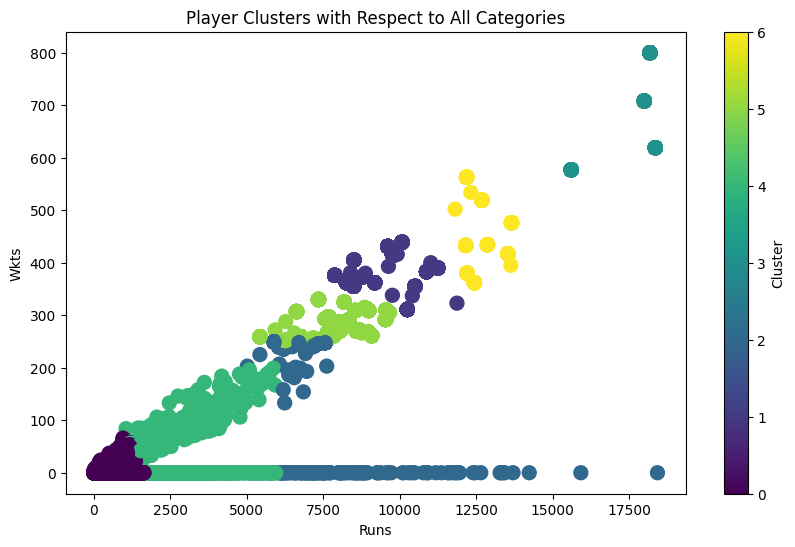

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Apply the function
category['Category'] = category.apply(categorize_player, axis=1)

# Encode the categories as numerical values aand give suitable names for indentity
category_mapping = {'Legend': 0, 'Good Batsman': 1, 'All-Rounder': 2, 'Batsman': 3, 'Good Bowler': 4, 'Bowler' : 5,  'Emerging':6  }
category['Category_Code'] = category['Category'].map(category_mapping)

# Features for clustering
features = category[['Runs', 'Wkts', 'Category_Code']]

# Normalize the data to ensure the required clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=7, random_state=42)
category['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters of players
plt.figure(figsize=(10, 6))
plt.scatter(category['Runs'], category['Wkts'], c=category['Cluster'], cmap='viridis', s=100)
plt.colorbar(label='Cluster')
plt.xlabel('Runs')
plt.ylabel('Wkts')
plt.title('Player Clusters with Respect to All Categories')
plt.show()




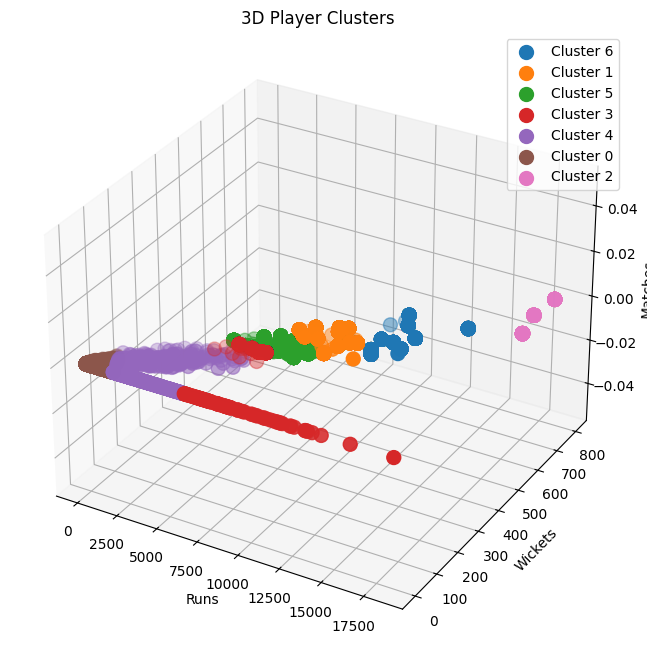

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in category['Cluster'].unique():
    cluster_data = category[category['Cluster'] == cluster]
    ax.scatter(cluster_data['Runs'], cluster_data['Wkts'], label=f'Cluster {cluster}', s=100)

ax.set_xlabel('Runs')
ax.set_ylabel('Wickets')
ax.set_zlabel('Matches')
plt.title('3D Player Clusters')
plt.legend()
plt.show()

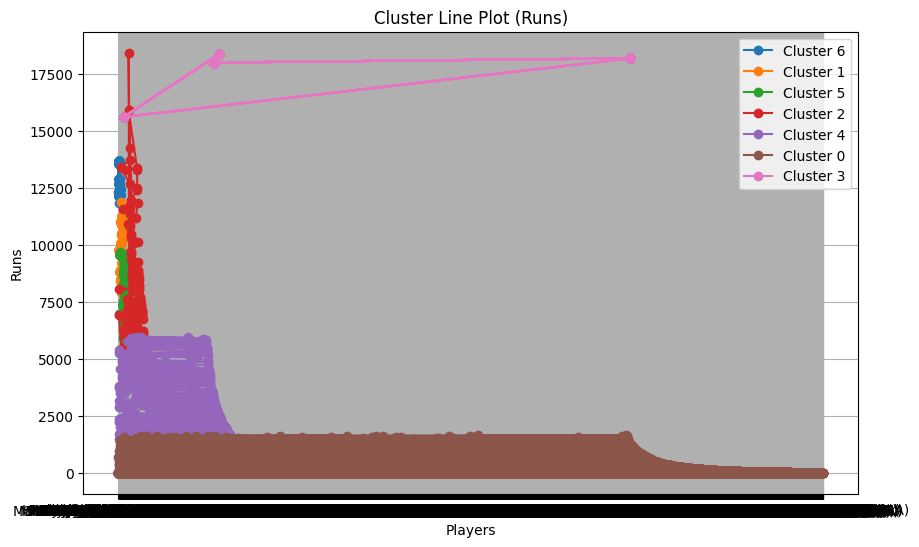

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in category['Cluster'].unique():
    cluster_data = category[category['Cluster'] == cluster]
    plt.plot(cluster_data['Player'], cluster_data['Runs'], label=f'Cluster {cluster}', marker='o')
plt.title('Cluster Line Plot (Runs)')
plt.xlabel('Players')
plt.ylabel('Runs')
plt.legend()
plt.grid()
plt.show()


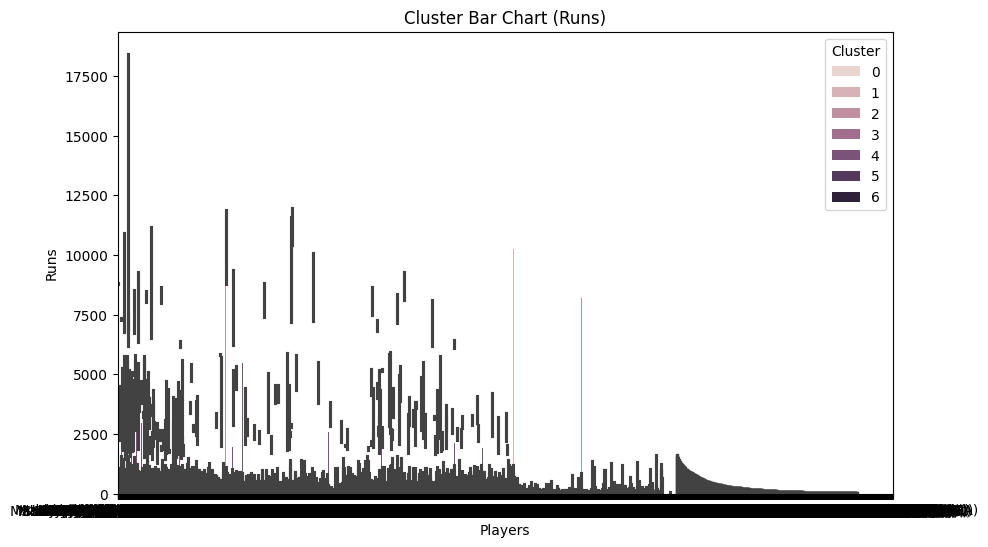

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=category, x='Player', y='Runs', hue='Cluster')
plt.title('Cluster Bar Chart (runs)')
plt.xlabel('Players')
plt.ylabel('Runs')
plt.legend(title='Cluster')
plt.show()


**FUNCTION TO GET THE REQUIRED TEAM FOR DIFFERENT SICANRIEO WITHOUT ANY MODEL**

In [ ]:
# Function to generate a cricket team
def generate_team(category, category_requirements):
    team = []
    for categoryy, count in category_requirements.items():
        # Check if the category exists in the DataFrame
        if categoryy not in category['Category'].unique():
            print(f"Warning: Category '{categoryy}' not found in the dataset.")
            continue

        # Filter players by category
        players_in_category = category[category['Category'] == categoryy]

        # Ensure there are enough players to select
        if len(players_in_category) < count:
            print(f"Warning: Not enough players in category '{categoryy}'. Selecting all available players.")
            count = len(players_in_category)

        # Select required number of players
        selected_players = players_in_category.head(count)
        team.append(selected_players)


    if team:
        team_df = pd.concat(team)
        return team_df
    else:
        print("No valid categories ")
        return pd.DataFrame()

# User input for team requirements , Different team for different situations
category_requirements = {
    'Batsman': 6,
    'Bowler': 4,
    'All-Rounder': 1,

}

# Generate the cricket team according to the input
team = generate_team(category, category_requirements)

# Output the team WE REQUIRED
if not team.empty:
    print("Selected Cricket Team:")
    print(team)
else:
    print("No team could be created.")

Selected Cricket Team:
                          Player       Span  Mat    Runs   Wkts     Category  \
38          KMDN Kulasekara (SL)  2003-2017  184  6751.0  199.0      Batsman   
39            BKV Prasad (INDIA)  1994-2001  161  6332.0  196.0      Batsman   
41                SR Waugh (AUS)  1986-2002  325  6761.0  195.0      Batsman   
42                CL Hooper (WI)  1987-2003  227  6958.0  193.0      Batsman   
46               TG Southee (NZ)  2008-2019  140  6373.0  186.0      Batsman   
50             RA Jadeja (INDIA)  2009-2019  159  6552.0  181.0      Batsman   
26  Shoaib Akhtar (Asia/ICC/PAK)  1998-2011  163  6169.0  247.0  All-Rounder   

    Category_Code  Cluster  
38              3        2  
39              3        2  
41              3        2  
42              3        2  
46              3        2  
50              3        2  
26              2        2  
